In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from collections import defaultdict

import sys
sys.path.append('../')
sys.path.append('../phase')
from phase.input_output import PhaseData
from phase.qc import OutlierDetector

In [5]:
data_dir = '../../DATA/ssc.hg38'
data_dir = '../../DATA/hg002'
#phase_name = 'X'
phase_name = None

colors = ['#ef6c00ff', '#4db6acff', '#b3a77dff', '#695d46ff', '#ce93d8ff', '#009668ff', ]

In [6]:
phase_data = PhaseData(data_dir, phase_name)

deletions = phase_data.get_deletions()
print('deletions', len(deletions))

deletions 230


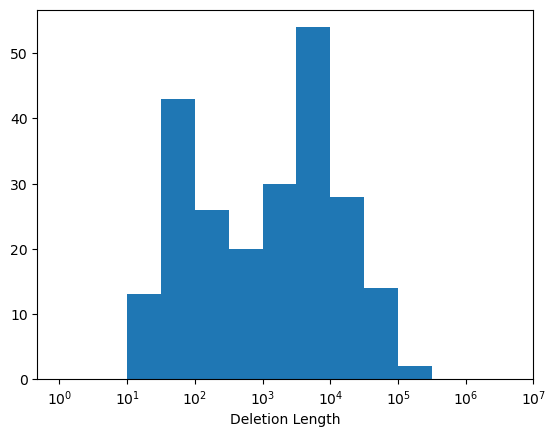

In [7]:
plt.hist(np.log10([x['length'] for x in deletions]), bins=np.arange(0, 7, 0.5))
plt.xlabel('Deletion Length')
plt.xticks(np.arange(8), ['$10^%d$'%i for i in np.arange(8)])
plt.show()

In [8]:
parent_to_bp_deleted = defaultdict(int)
for d in deletions:
    parent_to_bp_deleted[(d['family'], d['is_mat'])] += d['length']

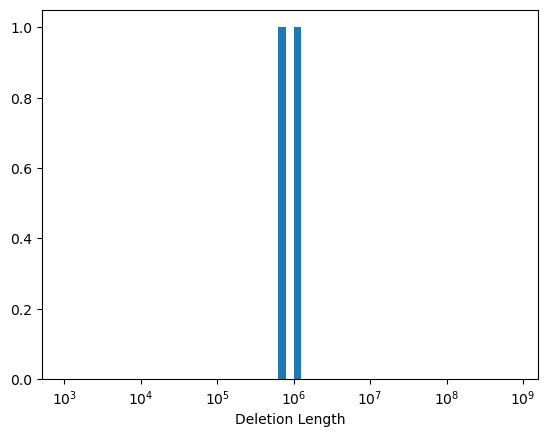

In [9]:
plt.hist(np.log10(list(parent_to_bp_deleted.values())), bins=np.arange(3, 9, 0.1))
plt.xlabel('Deletion Length')
plt.xticks(np.arange(3, 10), ['$10^%d$'%i for i in np.arange(3, 10)])
plt.show()